In [103]:
# 한글 설정
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [104]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
from dotenv import load_dotenv

print(load_dotenv())

False


In [106]:
!kaggle datasets download prachi13/customer-analytics

Dataset URL: https://www.kaggle.com/datasets/prachi13/customer-analytics
License(s): other
customer-analytics.zip: Skipping, found more recently modified local copy (use --force to force download)


In [107]:
import zipfile

HOME = os.getcwd()

zip_file_path = os.path.join(HOME,'customer-analytics.zip')
extract_to_path = os.path.join(HOME,'data')

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)
    print(f"압축 해제 완료: {extract_to_path}")
# 해제된 파일 목록 확인
print("현재 폴더 파일 목록:", os.listdir(extract_to_path))

압축 해제 완료: c:\Users\User\github\DataScience\Ecom_Shipping\data
현재 폴더 파일 목록: ['Train.csv']


데이터셋 불러오기

In [108]:
HOME = os.getcwd()

df_csv= os.path.join(extract_to_path,'train.csv')

df = pd.read_csv(df_csv)

df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


**컬럼 소개 (California Housing Dataset)**

행의 수 : 10999 <br>
컬럼 수 : 12 

* **ID**: 고객 ID 번호
* **Warehouse block**: 창고 구역 (A, B, C, D, E 블록으로 구분)
* **Mode of shipment**: 배송 수단 (선박, 항공, 도로)
* **Customer care calls**: 배송 문의를 위해 고객 센터에 전화한 횟수
* **Customer rating**: 고객 평점 (1: 가장 낮음/최악, 5: 가장 높음/최고)
* **Cost of rhthe product**: 제품 가격 (미국 달러 기준)
* **Prior purchases**: 이전 구매 횟수
* **Product importance**: 제품 중요도 (낮음, 중간, 높음으로 분류)
* **Gender**: 성별 (남성, 여성)
* **Discount offered**: 해당 제품에 제공된 할인액
* **Weight in gms**: 제품 무게 (그램 단위)
* **Reached on time**: 정시 도착 여부 (타겟 변수 - 1: 정시에 도착하지 않음, 0: 정시에 도착함)

### [배송 지연 원인](https://pthms.com/news/shipment-delay-what-are-the-causal-factors-of-delays-in-shipments-?utm_source=chatgpt.com)
* 악천후 / 외부 요인: 폭풍, 안개 등 기상 악화나 사고가 운송 경로의 안전을 위협하여 이동이 중단되거나 늦어지는 현상을 의미
-> 외부 환경 데이터의 부재 (기상, 사고)<br>
* 일정 변경 및 교통 문제: 운항 스케줄의 변동이나 도로·항로의 병목 현상으로 인해 정해진 출발 및 도착 시간이 지연되는 상황<br>
-> 운송 데이터의 부재 (운송 스케줄, 도로·항로의 병목 현상)<br>
* 세관 문제: 국제 운송 시 서류 부실이나 규정 위반으로 인해 국경 통과를 위한 검사와 승인 절차가 길어지는 것을 의미<br>
-> 제품 가격(Cost), 할인액(Discount)<br>
* 터미널 혼잡: 항구, 공항, 물류 창고 등에 화물이 몰려 상하차 및 처리 대기 시간이 길어지면서 배송이 늦어지는 상태를 의미<br>
-> 배송 수단(Mode), 창고 구역(Block)<br>
* 적재 제외(롤드/오프로드): 운송 수단의 용량 부족이나 서류 문제로 인해 화물이 계획된 편편에 실리지 못하고 다음 차례로 밀려나는 현상을 의미<br>
-> 제품 중요도(Importance), 무게(Weight)<br>

+정시 도착 여부와 고객들의 관계<br>
-> 고객 문의 횟수 (Customer care calls),고객 평점 (Customer rating),이전 구매 횟수 (Prior purchases),성별 (Gender)

In [110]:
# Reached on time을 target으로 변경
df['target'] = df['Reached.on.Time_Y.N']
df = df.drop(columns=['Reached.on.Time_Y.N'])
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,target
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [111]:
# 1. 특정 범위 설정
x_min, x_max = 1000, 2000
y_min, y_max = 0, 10
# 2. 조건에 맞는 데이터 필터링
subset = df[
    (df['Weight_in_gms'] >= x_min) & (df['Weight_in_gms'] <= x_max) & 
    (df['Discount_offered'] >= y_min) & (df['Discount_offered'] <= y_max)
]
# 3. 개수 출력
count = len(subset)
print(f"해당 영역({x_min}~{x_max}, {y_min}~{y_max}) 내의 점 개수: {count}개")
print(f"그 중 배송 지연(target=1)인 개수: {subset['target'].sum()}개")

해당 영역(1000~2000, 0~10) 내의 점 개수: 2123개
그 중 배송 지연(target=1)인 개수: 1077개


### 데이터 분석

#### **Reached on time**: 정시 도착 여부 (타겟 변수 - 1: 정시에 도착하지 않음, 0: 정시에 도착함)

In [112]:
df['target'].value_counts()

target
1    6563
0    4436
Name: count, dtype: int64

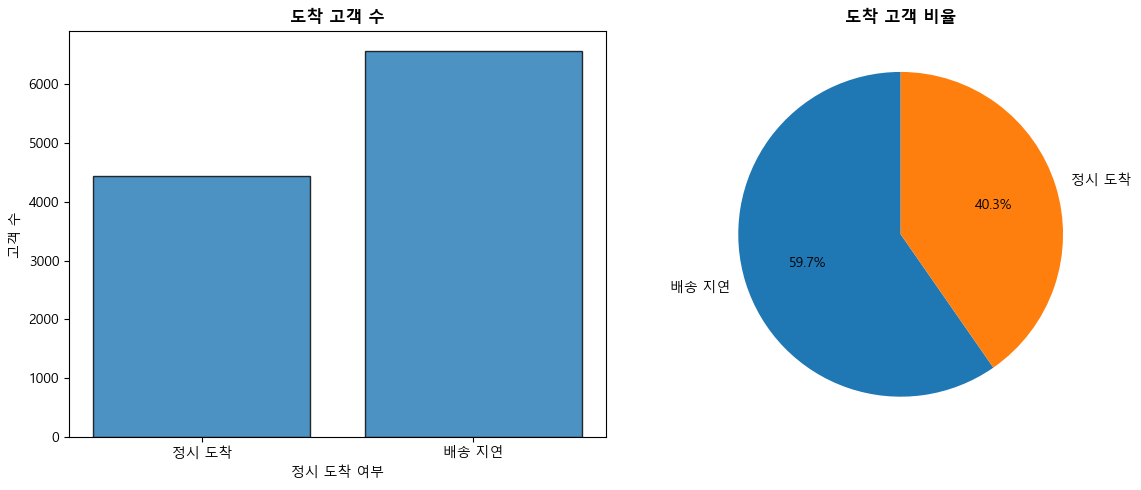

In [113]:
class_counts = df['target'].value_counts()

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 막대 그래프
axes[0].bar(df['target'].unique(), class_counts.values, edgecolor='black', alpha=0.8)
axes[0].set_title('도착 고객 수', fontweight='bold')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['정시 도착', '배송 지연'])
axes[0].set_xlabel('정시 도착 여부')
axes[0].set_ylabel('고객 수')

# 파이 차트
m_labels = ['배송 지연', '정시 도착'] 
axes[1].pie(class_counts.values, labels=m_labels, autopct='%1.1f%%', startangle=90)
axes[1].set_title('도착 고객 비율', fontweight='bold')
plt.tight_layout()
plt.show()

#### **ID**: 고객 ID 번호

In [114]:
print(f"중복되지 않은 데이터 수: {df['ID'].nunique()}")
print("중복된 데이터 수:", df['ID'].duplicated().sum())
print("중복된 데이터가 많아서 ID 삭제")

중복되지 않은 데이터 수: 10999
중복된 데이터 수: 0
중복된 데이터가 많아서 ID 삭제


In [115]:
mean_val = df['target'].mean()

#### **Warehouse block**: 창고 구역 (A, B, C, D, E 블록으로 구분)

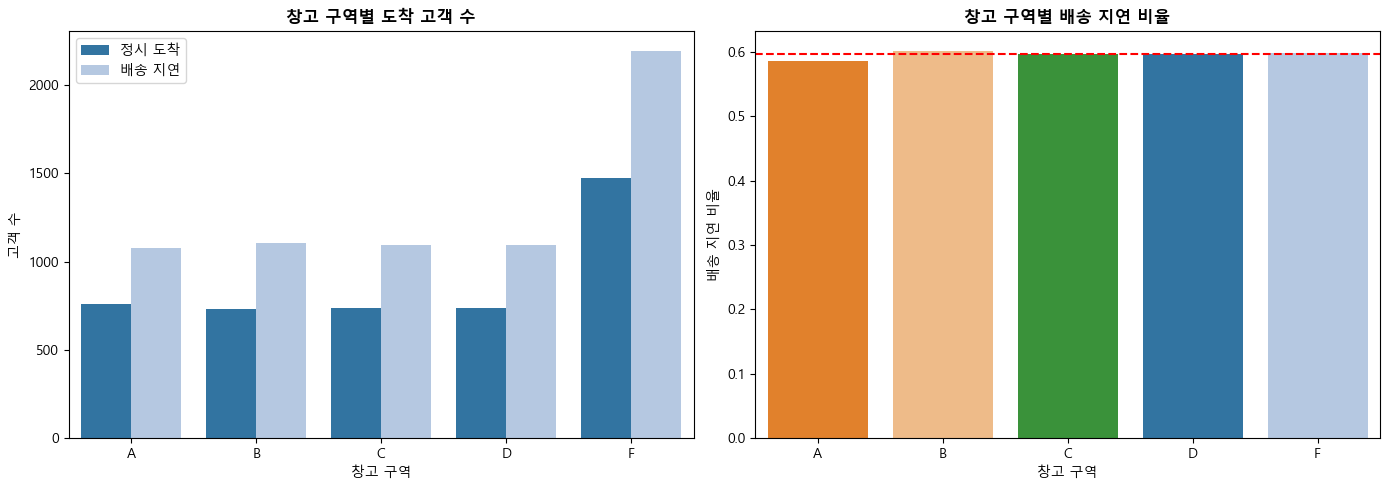

In [116]:
sorted_warehouse = sorted(df['Warehouse_block'].unique())

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Warehouse_block', hue='target', data=df, order=sorted_warehouse, palette='tab20', ax=axes[0])
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_title('창고 구역별 도착 고객 수', fontweight='bold')
axes[0].set_xlabel('창고 구역')
axes[0].set_ylabel('고객 수')

sns.barplot(x='Warehouse_block', y='target', data=df, order=sorted_warehouse, palette='tab20', hue='Warehouse_block', errorbar=None, ax=axes[1])
axes[1].set_title('창고 구역별 배송 지연 비율', fontweight='bold')
axes[1].axhline(mean_val, color='red', linestyle='--', label='전체 평균')
axes[1].set_xlabel('창고 구역')
axes[1].set_ylabel('배송 지연 비율')

plt.tight_layout()
plt.show()

#### **Mode of shipment**: 배송 수단 (선박, 항공, 도로)

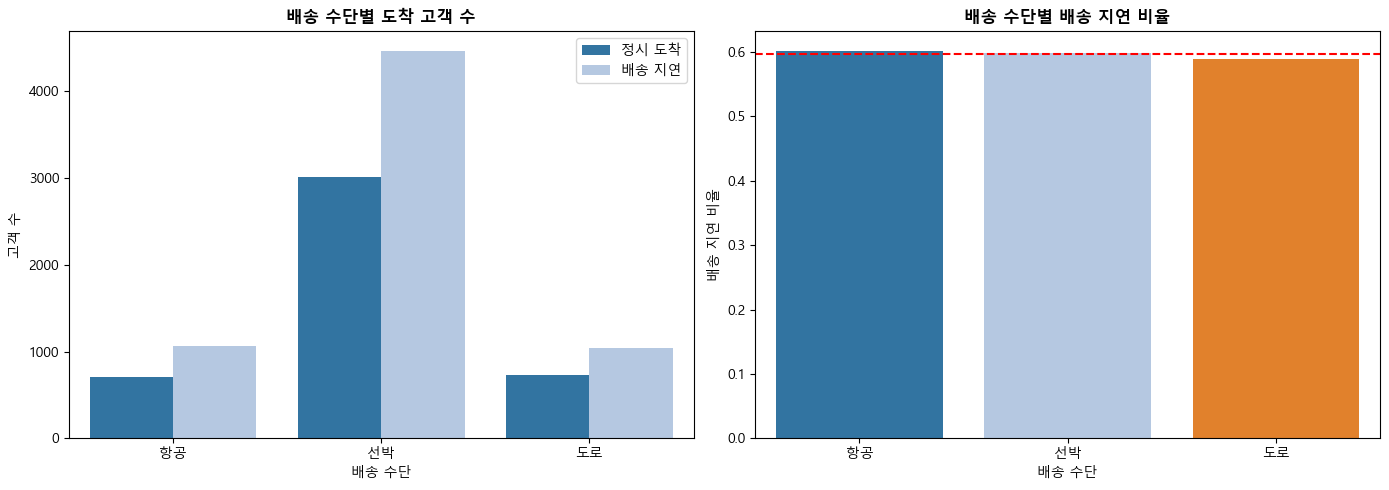

In [117]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Mode_of_Shipment', hue='target', data=df, palette='tab20', ax=axes[0])
axes[0].set_title('배송 수단별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xticks([0, 1, 2])
axes[0].set_xticklabels(['항공', '선박','도로'])
axes[0].set_xlabel('배송 수단')
axes[0].set_ylabel('고객 수')

sns.barplot(x='Mode_of_Shipment', y='target', data=df, palette='tab20', hue='Mode_of_Shipment', errorbar=None, ax=axes[1])
axes[1].set_title('배송 수단별 배송 지연 비율', fontweight='bold')
axes[1].axhline(mean_val, color='red', linestyle='--', label='전체 평균')
axes[1].set_xticks([0, 1, 2])
axes[1].set_xticklabels(['항공', '선박','도로'])
axes[1].set_xlabel('배송 수단')
axes[1].set_ylabel('배송 지연 비율')

plt.tight_layout()
plt.show()

#### **Customer care calls**: 배송 문의를 위해 고객 센터에 전화한 횟수

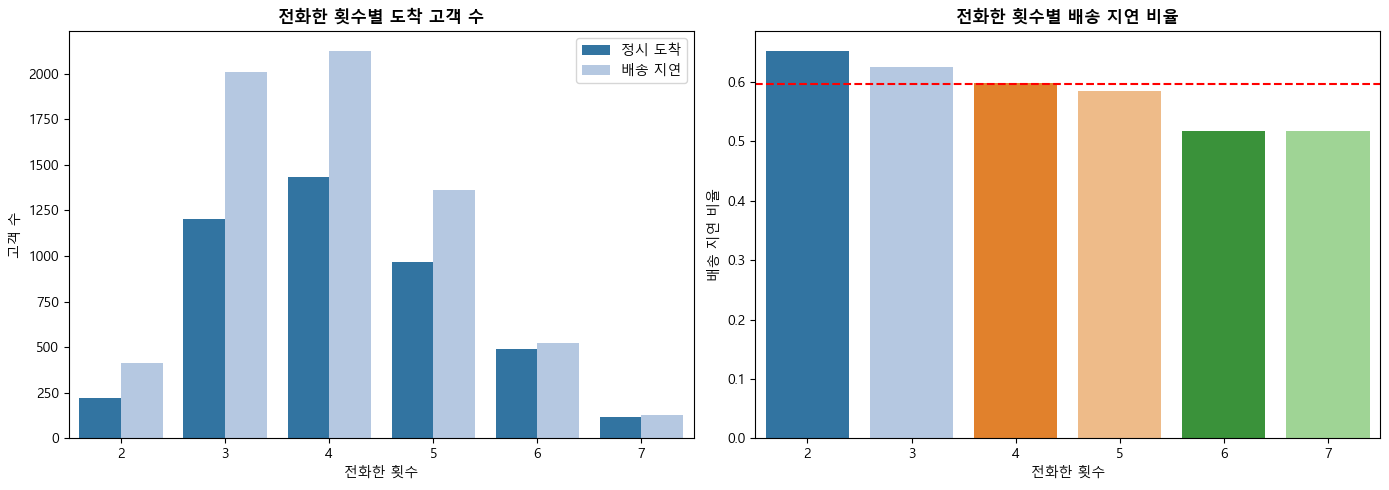

In [118]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Customer_care_calls', hue='target', data=df, palette='tab20', ax=axes[0])
axes[0].set_title('전화한 횟수별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xlabel('전화한 횟수')
axes[0].set_ylabel('고객 수')

sns.barplot(x='Customer_care_calls', y='target', data=df, palette='tab20', hue='Customer_care_calls', legend=False, errorbar=None, ax=axes[1])
axes[1].set_title('전화한 횟수별 배송 지연 비율', fontweight='bold')
axes[1].axhline(mean_val, color='red', linestyle='--', label='전체 평균')
axes[1].set_xlabel('전화한 횟수')
axes[1].set_ylabel('배송 지연 비율')

plt.tight_layout()
plt.show()

#### **Customer rating**: 고객 평점 (1: 가장 낮음/최악, 5: 가장 높음/최고)

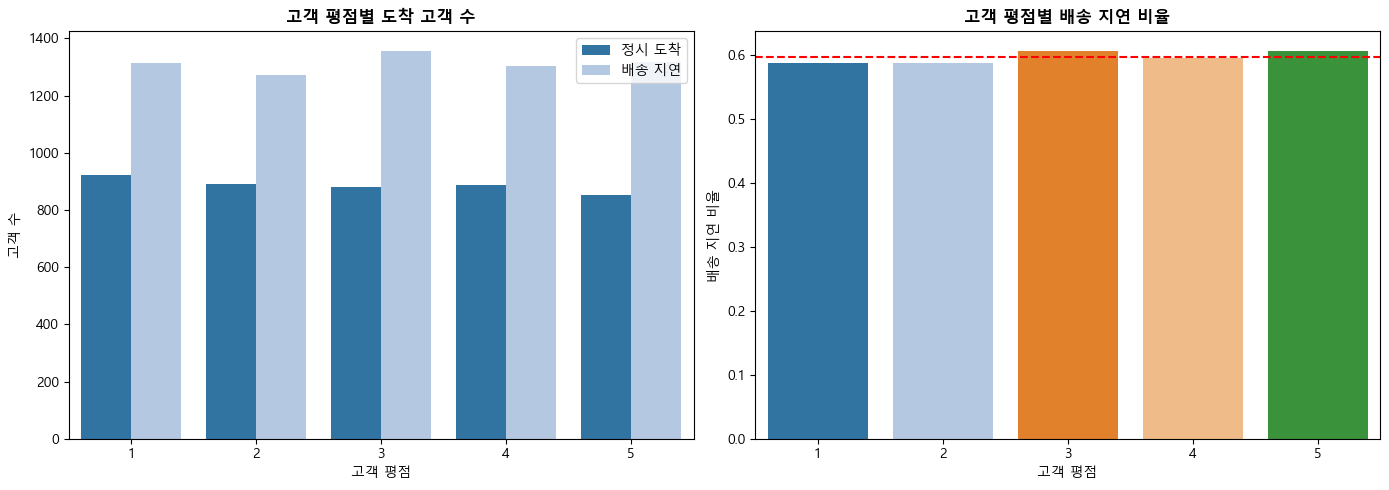

In [119]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Customer_rating', hue='target', data=df, palette='tab20', ax=axes[0])
axes[0].set_title('고객 평점별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xlabel('고객 평점')
axes[0].set_ylabel('고객 수')

sns.barplot(x='Customer_rating', y='target', data=df, palette='tab20', hue='Customer_rating', legend=False, errorbar=None, ax=axes[1])
axes[1].set_title('고객 평점별 배송 지연 비율', fontweight='bold')
axes[1].axhline(mean_val, color='red', linestyle='--', label='전체 평균')
axes[1].set_xlabel('고객 평점')
axes[1].set_ylabel('배송 지연 비율')
plt.tight_layout()
plt.show()

#### **Cost of the product**: 제품 가격 (미국 달러 기준)

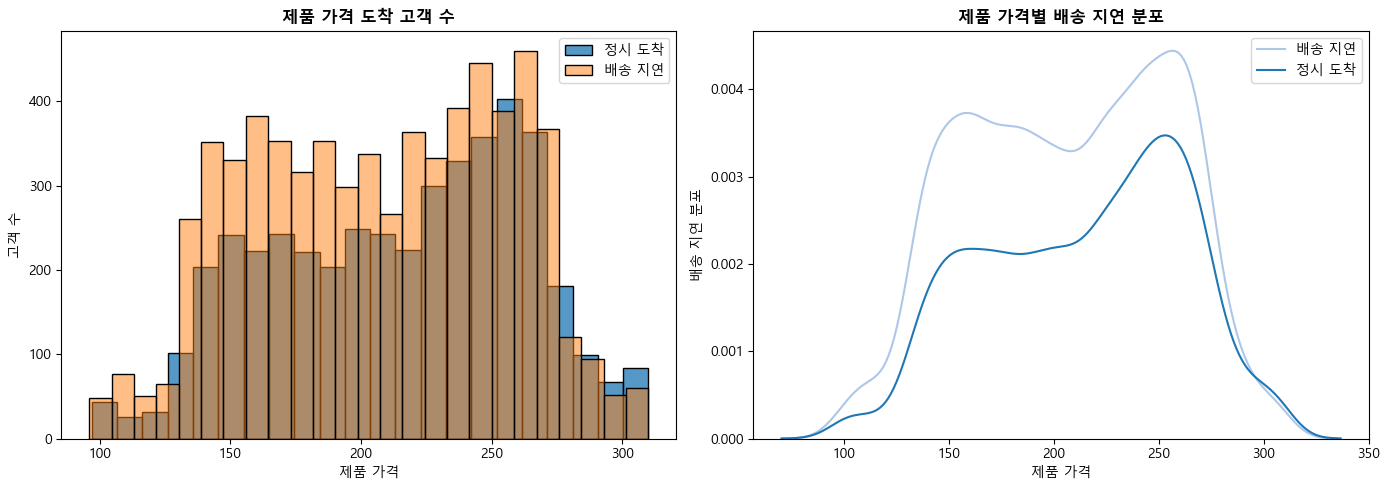

In [120]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df[df['target'] == 0]['Cost_of_the_Product'], ax=axes[0])
sns.histplot(df[df['target'] == 1]['Cost_of_the_Product'], ax=axes[0], alpha=0.5)
axes[0].set_title('제품 가격 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xlabel('제품 가격')
axes[0].set_ylabel('고객 수')

sns.kdeplot(x='Cost_of_the_Product', hue='target', data=df, palette='tab20', ax=axes[1])
axes[1].set_title('제품 가격별 배송 지연 분포', fontweight='bold')
axes[1].legend(['배송 지연','정시 도착'])
axes[1].set_xlabel('제품 가격')
axes[1].set_ylabel('배송 지연 분포')

plt.tight_layout()
plt.show()

#### **Prior purchases**: 이전 구매 횟수

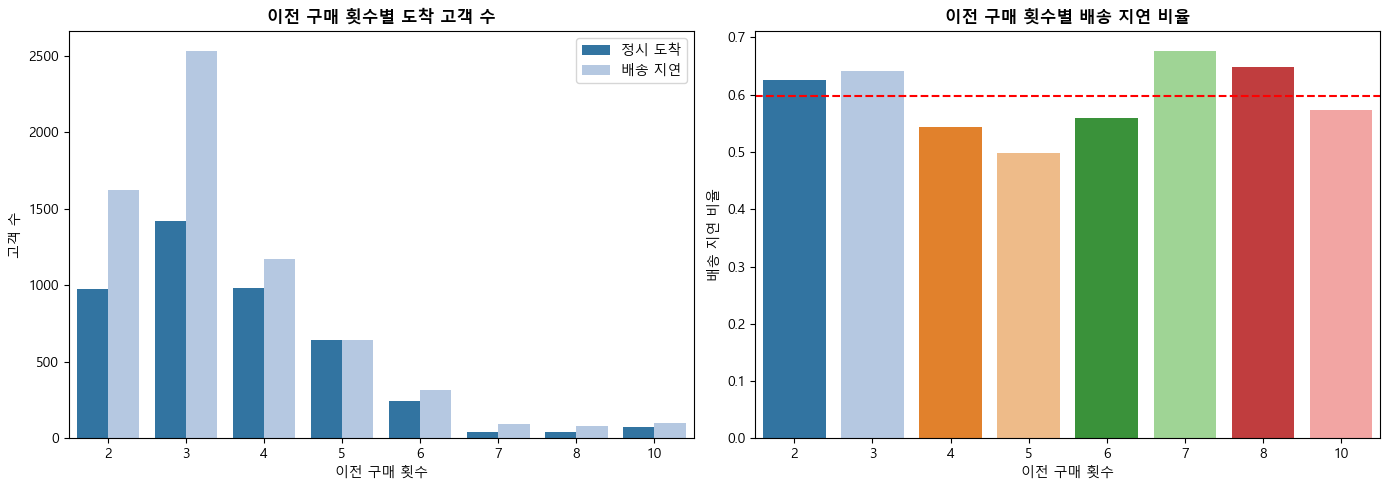

In [121]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Prior_purchases', hue='target', data=df, palette='tab20', ax=axes[0])
axes[0].set_title('이전 구매 횟수별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xlabel('이전 구매 횟수')
axes[0].set_ylabel('고객 수')

sns.barplot(x='Prior_purchases', y='target', data=df, palette='tab20', hue='Prior_purchases', legend=False, errorbar=None, ax=axes[1])
axes[1].set_title('이전 구매 횟수별 배송 지연 비율', fontweight='bold')
axes[1].axhline(mean_val, color='red', linestyle='--', label='전체 평균')
axes[1].set_xlabel('이전 구매 횟수')
axes[1].set_ylabel('배송 지연 비율')

plt.tight_layout()
plt.show()

#### **Product importance**: 제품 중요도 (낮음, 중간, 높음으로 분류)

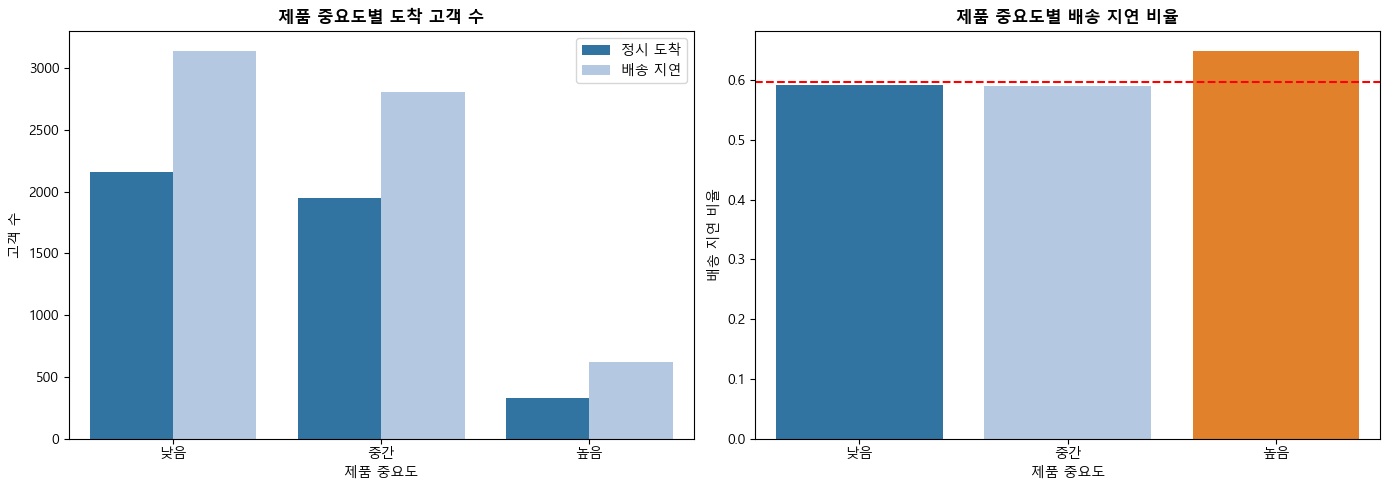

In [122]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Product_importance', hue='target', data=df, palette='tab20', ax=axes[0])
axes[0].set_title('제품 중요도별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xticks([0, 1, 2])
axes[0].set_xticklabels(['낮음', '중간', '높음'])
axes[0].set_xlabel('제품 중요도')
axes[0].set_ylabel('고객 수')

sns.barplot(x='Product_importance', y='target', data=df, palette='tab20', hue='Product_importance', legend=False, errorbar=None, ax=axes[1])
axes[1].set_title('제품 중요도별 배송 지연 비율', fontweight='bold')
axes[1].axhline(mean_val, color='red', linestyle='--', label='전체 평균')
axes[1].set_xticks([0, 1, 2])
axes[1].set_xticklabels(['낮음', '중간', '높음'])
axes[1].set_xlabel('제품 중요도')
axes[1].set_ylabel('배송 지연 비율')

plt.tight_layout()
plt.show()

#### **Gender**: 성별 (남성, 여성)

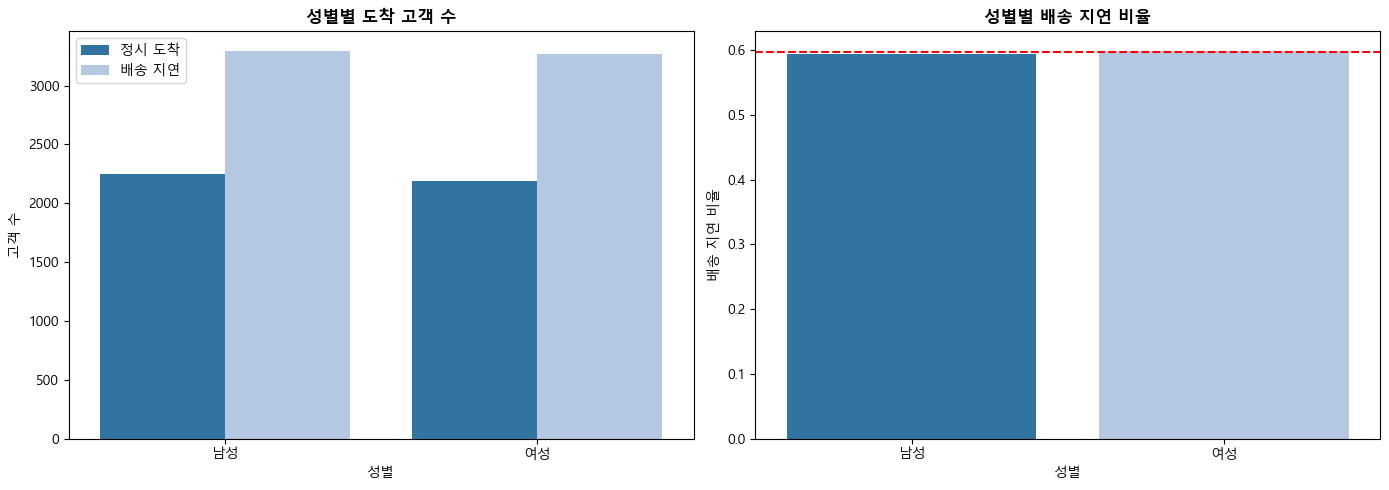

In [123]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Gender', hue='target', data=df, palette='tab20', ax=axes[0])
axes[0].set_title('성별별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['남성', '여성'])
axes[0].set_xlabel('성별')
axes[0].set_ylabel('고객 수')

sns.barplot(x='Gender', y='target', data=df, palette='tab20', hue='Gender', legend=False, errorbar=None, ax=axes[1])
axes[1].set_title('성별별 배송 지연 비율', fontweight='bold')
axes[1].axhline(mean_val, color='red', linestyle='--', label='전체 평균')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['남성', '여성'])
axes[1].set_xlabel('성별')
axes[1].set_ylabel('배송 지연 비율')

plt.tight_layout()
plt.show()

### **Discount offered**: 해당 제품에 제공된 할인액

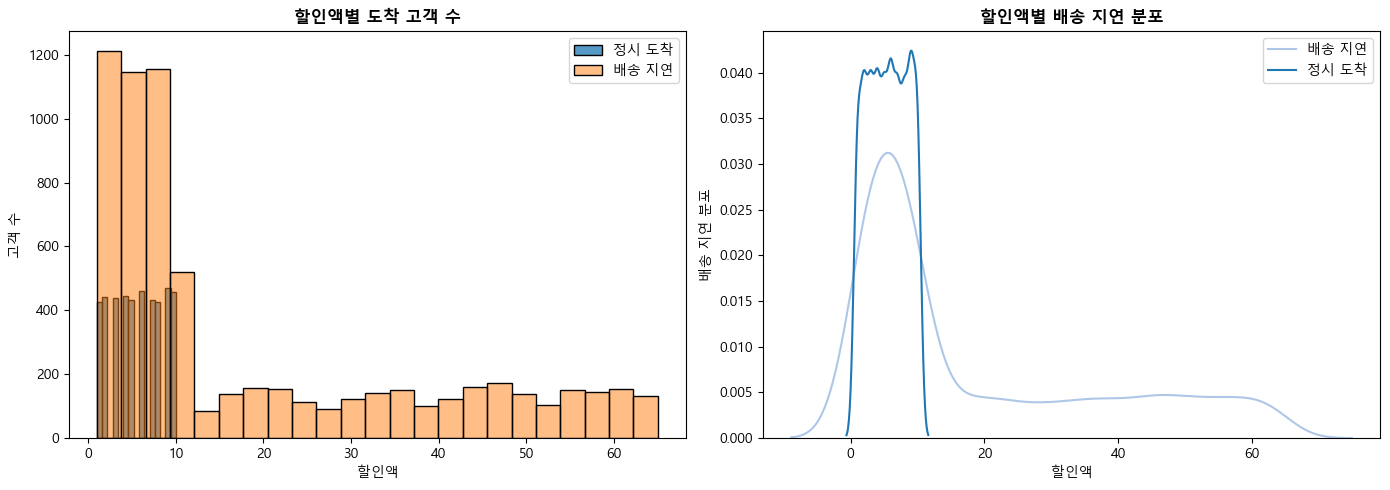

In [124]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df[df['target'] == 0]['Discount_offered'], ax=axes[0])
sns.histplot(df[df['target'] == 1]['Discount_offered'], ax=axes[0], alpha=0.5)
axes[0].set_title('할인액별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xlabel('할인액')
axes[0].set_ylabel('고객 수')

sns.kdeplot(x='Discount_offered', hue='target', data=df, palette='tab20', ax=axes[1])
axes[1].set_title('할인액별 배송 지연 분포', fontweight='bold')
axes[1].legend(['배송 지연','정시 도착'])
axes[1].set_xlabel('할인액')
axes[1].set_ylabel('배송 지연 분포')

plt.tight_layout()
plt.show()

### **Weight in gms**: 제품 무게 (그램 단위)

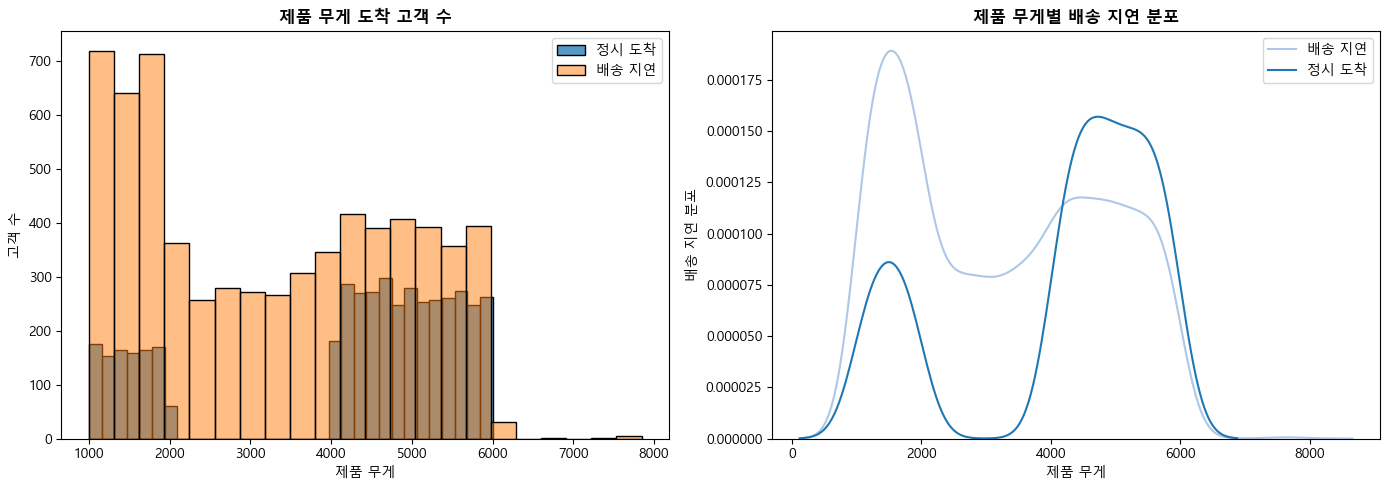

In [125]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df[df['target'] == 0]['Weight_in_gms'], ax=axes[0])
sns.histplot(df[df['target'] == 1]['Weight_in_gms'], ax=axes[0], alpha=0.5)
axes[0].set_title('제품 무게 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xlabel('제품 무게')
axes[0].set_ylabel('고객 수')

sns.kdeplot(x='Weight_in_gms', hue='target', data=df, palette='tab20', ax=axes[1])
axes[1].set_title('제품 무게별 배송 지연 분포', fontweight='bold')
axes[1].legend(['배송 지연','정시 도착'])
axes[1].set_xlabel('제품 무게')
axes[1].set_ylabel('배송 지연 분포')

plt.tight_layout()
plt.show()

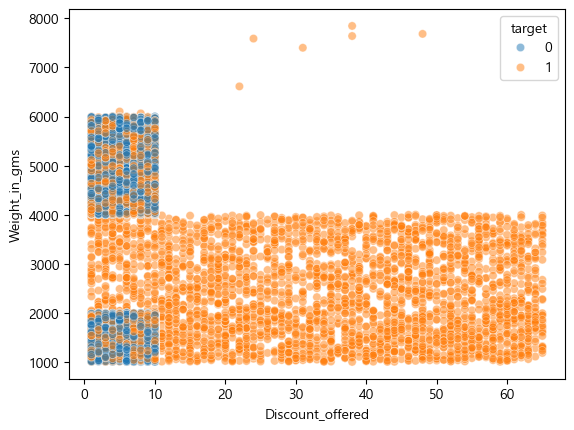

In [126]:
sns.scatterplot(x='Discount_offered', y='Weight_in_gms', hue='target', data=df, alpha=0.5)
plt.show()

지연 결정 요인: 
* 할인 제공 수준 (세관 문제 추정)
* 상품 무게 (적재 제외 추정)

운영 변수: <br>
터미널 혼잡(배송 수단·창고 구역)이 지연에 미치는 영향은 미미함<br>
고객 변수: <br>
개인 특성(성별, 평점 등)은 지연 여부와 통계적으로 무관함<br>

결론: 물류 지연은 고객 특성이나 인프라 환경보다 통관 행정(가격) 및 적재 공정(무게) 등 화물 처리 데이터와 밀접하게 관련되어 있음

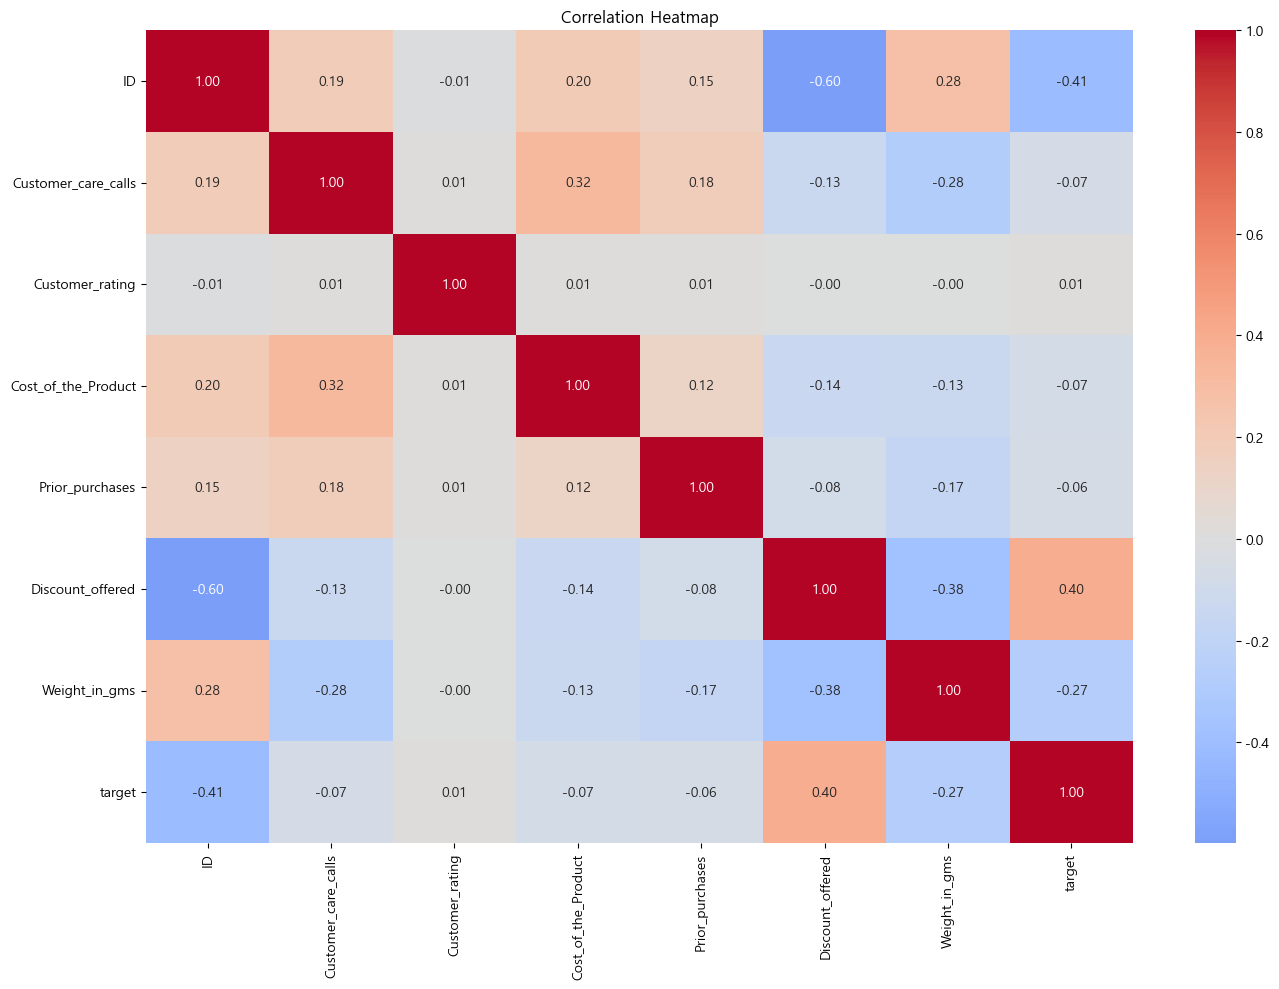

In [127]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.drop(columns=['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']).corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

### 2. 특성 엔지니어링

In [128]:
# 1. 할인액 범주화 (Discount_Category) -> 범위
# 할인율 10%를 기점으로 세관 정밀 검사 가능성을 '낮음'과 '높음'으로 분류합니다.
df['Discount_Category'] = pd.cut(df['Discount_offered'], bins=[0, 10, 100], labels=['Low', 'High'], include_lowest=True)

# 2. 무게 구간 분류 (Weight_Category) -> 범위
# 연속적인 무게 데이터를 지연 패턴에 따라 가벼움, 보통, 무거움의 3개 구간으로 나눕니다.
df['Weight_Category'] = pd.cut(df['Weight_in_gms'], bins=[0, 2000, 4000, 8000], labels=['Light', 'Medium', 'Heavy'])

# 3. 무게 대비 할인 비중 (Discount_Weight_Ratio) -> 지연 결정 요인
# 화물 무게와 할인 금액 간의 관계를 계산하여 저가 신고 의심 여부를 분석합니다.
df['Discount_Weight_Ratio'] = df['Discount_offered'] / (df['Weight_in_gms'] + 1)

# 4. 최종 결제 금액 (Final_Cost) -> 세관 문제
# 제품 가격에 할인율을 적용하여 고객이 실제로 지불한 최종 금액을 산출합니다.
df['Final_Cost'] = df['Cost_of_the_Product'] * (1 - df['Discount_offered'] / 100)

# 5. 중요도별 무게 비중 (Weight_Load_Factor) -> 적재 제외
# 제품 중요도 대비 무게를 계산하여 적재 시 우선순위에서 밀려날 가능성을 수치화합니다.
importance_map = {'low': 1, 'medium': 2, 'high': 3}
df['Weight_Load_Factor'] = df['Weight_in_gms'] / (df['Product_importance'].map(importance_map))


삭제할 컬럼
* 터미널 혼잡<br>
-> 배송 수단(Mode), 창고 구역(Block)<br>
* 정시 도착 여부와 고객들의 관계<br>
-> 고객 문의 횟수 (Customer care calls),고객 평점 (Customer rating),이전 구매 횟수 (Prior purchases),성별 (Gender)<br>

In [129]:
df = df.drop(['ID','Warehouse_block','Mode_of_Shipment','Customer_care_calls','Customer_rating','Prior_purchases','Gender'], axis=1)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Cost_of_the_Product    10999 non-null  int64   
 1   Product_importance     10999 non-null  object  
 2   Discount_offered       10999 non-null  int64   
 3   Weight_in_gms          10999 non-null  int64   
 4   target                 10999 non-null  int64   
 5   Discount_Category      10999 non-null  category
 6   Weight_Category        10999 non-null  category
 7   Discount_Weight_Ratio  10999 non-null  float64 
 8   Final_Cost             10999 non-null  float64 
 9   Weight_Load_Factor     10999 non-null  float64 
dtypes: category(2), float64(3), int64(4), object(1)
memory usage: 709.3+ KB


* 라벨 인코딩(Label Encoding)

In [131]:
from sklearn.preprocessing import LabelEncoder

categorical_features = df.select_dtypes(include=['object','category']).columns.tolist()

for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Cost_of_the_Product    10999 non-null  int64  
 1   Product_importance     10999 non-null  int64  
 2   Discount_offered       10999 non-null  int64  
 3   Weight_in_gms          10999 non-null  int64  
 4   target                 10999 non-null  int64  
 5   Discount_Category      10999 non-null  int64  
 6   Weight_Category        10999 non-null  int64  
 7   Discount_Weight_Ratio  10999 non-null  float64
 8   Final_Cost             10999 non-null  float64
 9   Weight_Load_Factor     10999 non-null  float64
dtypes: float64(3), int64(7)
memory usage: 859.4 KB


* 원-핫 인코딩(One-Hot Encoding)

In [132]:
# df = pd.get_dummies(df, columns=['Discount_Category','Weight_Category'])

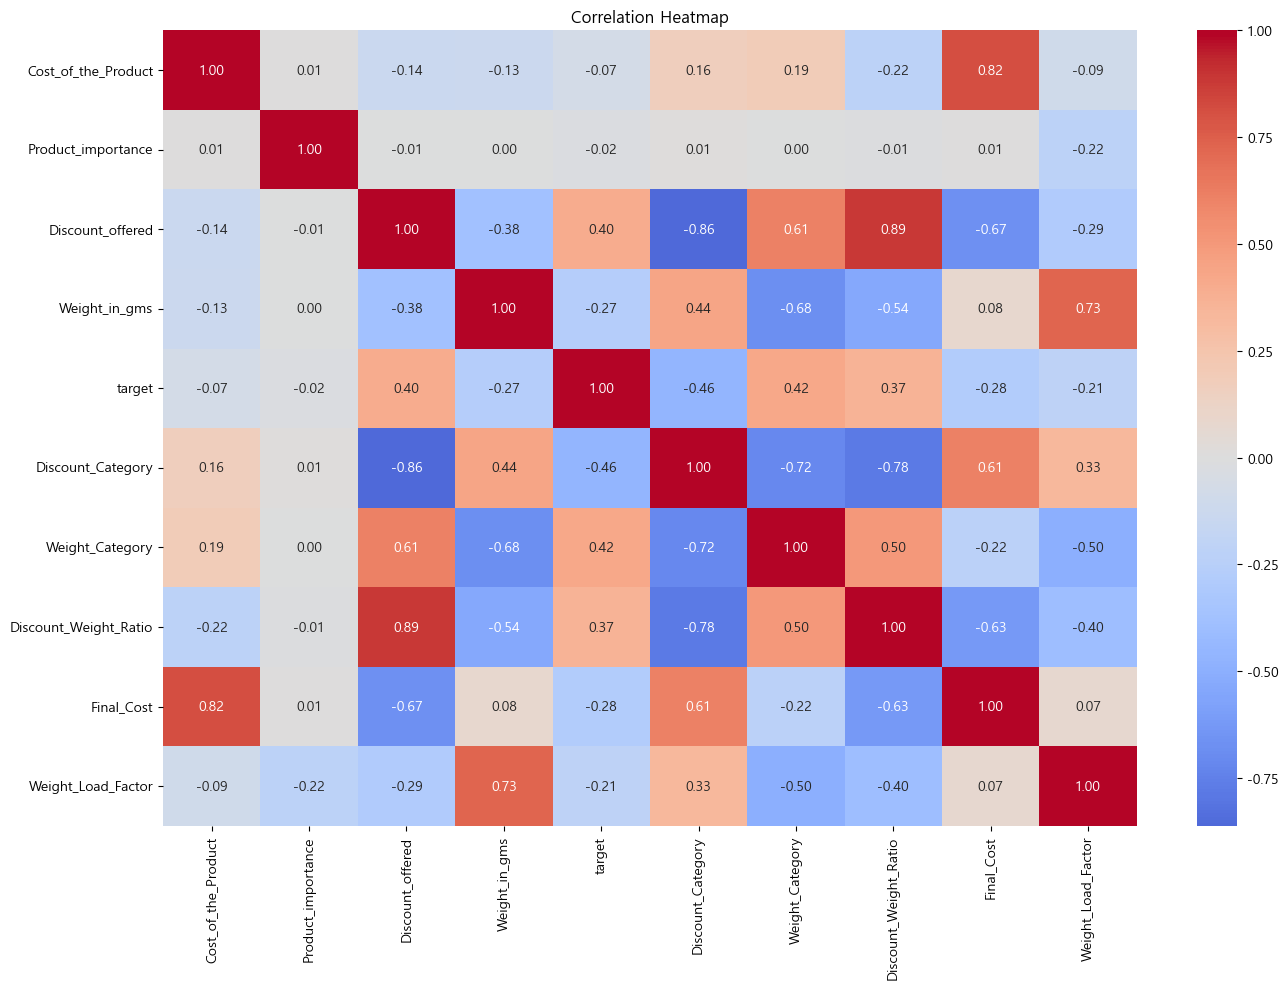

In [133]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [134]:
df.describe().round(4)

,Cost_of_the_Product,Product_importance,Discount_offered,Weight_in_gms,target,Discount_Category,Weight_Category,Discount_Weight_Ratio,Final_Cost,Weight_Load_Factor
count,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000
mean,210.1968,1.3460,13.3732,3634.0167,0.5967,0.7593,0.6201,0.0060,183.1640,2601.6454
std,48.0633,0.6314,16.2055,1635.3773,0.4906,0.4275,0.7488,0.0094,56.9073,1553.1516
min,96.0000,0.0000,1.0000,1001.0000,0.0000,0.0000,0.0000,0.0002,36.6300,335.6667
25%,169.0000,1.0000,4.0000,1839.5000,0.0000,1.0000,0.0000,0.0009,140.1500,1400.0000
50%,214.0000,1.0000,7.0000,4149.0000,1.0000,1.0000,0.0000,0.0017,186.2400,2196.5000
75%,251.0000,2.0000,10.0000,5050.0000,1.0000,1.0000,1.0000,0.0062,231.2800,3859.5000
max,310.0000,2.0000,65.0000,7846.0000,1.0000,1.0000,2.0000,0.0595,306.9000,6000.0000


* 표준화(Standardization)

In [135]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
df['Cost_of_the_Product'] = standard_scaler.fit_transform(df['Cost_of_the_Product'].values.reshape(-1,1))
df['Discount_offered'] = standard_scaler.fit_transform(df['Discount_offered'].values.reshape(-1,1))
df['Weight_in_gms'] = standard_scaler.fit_transform(df['Weight_in_gms'].values.reshape(-1,1))
df['Discount_Weight_Ratio'] = standard_scaler.fit_transform(df['Discount_Weight_Ratio'].values.reshape(-1,1))
df['Final_Cost'] = standard_scaler.fit_transform(df['Final_Cost'].values.reshape(-1,1))
df['Weight_Load_Factor'] = standard_scaler.fit_transform(df['Weight_Load_Factor'].values.reshape(-1,1))


df.describe().round(4)

,Cost_of_the_Product,Product_importance,Discount_offered,Weight_in_gms,target,Discount_Category,Weight_Category,Discount_Weight_Ratio,Final_Cost,Weight_Load_Factor
count,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000
mean,-0.0000,1.3460,-0.0000,-0.0000,0.5967,0.7593,0.6201,0.0000,-0.0000,0.0000
std,1.0000,0.6314,1.0000,1.0000,0.4906,0.4275,0.7488,1.0000,1.0000,1.0000
min,-2.3761,0.0000,-0.7636,-1.6101,0.0000,0.0000,0.0000,-0.6157,-2.5751,-1.4590
25%,-0.8572,1.0000,-0.5784,-1.0974,0.0000,1.0000,0.0000,-0.5335,-0.7559,-0.7737
50%,0.0791,1.0000,-0.3933,0.3149,1.0000,1.0000,0.0000,-0.4477,0.0541,-0.2609
75%,0.8490,2.0000,-0.2082,0.8659,1.0000,1.0000,1.0000,0.0213,0.8456,0.8099
max,2.0766,2.0000,3.1859,2.5757,1.0000,1.0000,2.0000,5.6981,2.1744,2.1881


In [136]:
from sklearn.model_selection import train_test_split

# df에 target값은 y_total 나머지는 x_total에 넣는디
x_total = df.drop(columns=['target'])
y_total = df['target']

x_train,x_test,y_train,y_test = train_test_split(x_total,y_total,test_size=0.2,random_state=42)

In [137]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

# 2. 모델 학습
model.fit(x_train, y_train)

# 3. 모델 예측
y_pred = model.predict(x_test)

# 4. 모델 평가
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.62      0.59       895
           1       0.72      0.66      0.69      1305

    accuracy                           0.65      2200
   macro avg       0.64      0.64      0.64      2200
weighted avg       0.65      0.65      0.65      2200



### 모델링 (AutoGluon)

In [138]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [139]:
# 합치기
train_data = pd.concat([x_train, y_train], axis=1)
test_data = pd.concat([x_test, y_test], axis=1)

print(f'학습 데이터 크기: {train_data.shape}')
print(f'검증 데이터 크기: {test_data.shape}')

학습 데이터 크기: (8799, 10)
검증 데이터 크기: (2200, 10)


In [140]:
import numpy as np
import random

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

predictor = TabularPredictor(
    label='target',                    # 타겟 변수
    problem_type='binary',           # 분류로 변경
    eval_metric='f1',               # 평가 지표 
    path='AutoGluon_v1'              # 모델 저장 경로
)

# 모델 학습
predictor.fit(
    train_data=train_data,
    tuning_data=test_data,             # 검증 데이터
    use_bag_holdout=True,
    presets='best_quality',            # 프리셋: 중간 품질
    time_limit=1200,                      # 최대 20분
    verbosity=2,                          # 로그 상세도
    ag_args_fit={'model_random_seed': SEED} 
)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.5.0
Python Version:     3.11.14
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26200
CPU Count:          8
Pytorch Version:    2.9.1+cpu
CUDA Version:       CUDA is not available
Memory Avail:       0.93 GB / 7.86 GB (11.9%)
Disk Space Avail:   110.10 GB / 237.43 GB (46.4%)
Presets specified: ['best_quality']
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to False. Reason: Skip dynamic_stacking when use_bag_holdout is enabled. (use_bag_holdout=True)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Failed to save metadata file due to exception 'NoneType' object has no attribute 'lower', skipping...
Beginning AutoGluon training ... Time limit = 1200s
AutoGluon will save models to "c:\Users\User\github\DataScience\Ecom_Shipping\AutoGluon_v1"
Train Data Rows:    8799

In [141]:
leaderboard = predictor.leaderboard(test_data,silent=True)
display(leaderboard)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,0.746959,0.746959,f1,9.131497,19.286079,783.025174,0.018679,0.013467,5.155488,3,True,19
1,WeightedEnsemble_L2,0.746174,0.746174,f1,1.722044,4.582562,286.328561,0.052254,0.008362,2.995508,2,True,10
2,LightGBM_BAG_L1,0.745245,0.745245,f1,0.419050,0.816389,18.550791,0.419050,0.816389,18.550791,1,True,1
3,XGBoost_BAG_L1,0.744650,0.744650,f1,0.567333,2.371605,35.748150,0.567333,2.371605,35.748150,1,True,8
4,LightGBM_BAG_L2,0.744359,0.744359,f1,7.858488,13.283927,556.809049,0.080157,0.791089,16.843339,2,True,12
5,LightGBMXT_BAG_L2,0.744000,0.744000,f1,7.922698,13.263802,568.681334,0.144367,0.770964,28.715624,2,True,11
6,NeuralNetFastAI_BAG_L2,0.706068,0.706068,f1,8.930275,17.984526,693.047413,1.151945,5.491688,153.081703,2,True,18
7,NeuralNetFastAI_BAG_L1,0.703893,0.703893,f1,2.326816,4.878645,185.080297,2.326816,4.878645,185.080297,1,True,7
8,RandomForestGini_BAG_L1,0.692920,0.692920,f1,1.078103,0.572344,8.621402,1.078103,0.572344,8.621402,1,True,2
9,ExtraTreesGini_BAG_L1,0.692706,0.692706,f1,0.906211,0.817164,3.460648,0.906211,0.817164,3.460648,1,True,5


In [142]:
# 검증 데이터 성능 평가
val_predictions = predictor.predict(test_data.drop('target', axis=1))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 2. 성능 지표 계산
accuracy = accuracy_score(y_test, val_predictions)
precision = precision_score(y_test, val_predictions)
recall = recall_score(y_test, val_predictions)
f1 = f1_score(y_test, val_predictions)

print('=== 검증 데이터 분류 성능 ===')
print(f'Accuracy (정확도): {accuracy:.4f}')
print(f'Precision (정밀도): {precision:.4f}')
print(f'Recall (재현율): {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

=== 검증 데이터 분류 성능 ===
Accuracy (정확도): 0.6123
Precision (정밀도): 0.6094
Recall (재현율): 0.9648
F1 Score: 0.7470


Computing feature importance via permutation shuffling for 9 features using 2200 rows with 5 shuffle sets...


=== 특성 중요도 ===


	358.29s	= Expected runtime (71.66s per shuffle set)
	108.56s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
Weight_Load_Factor,0.005714,0.000606,0.000015,5,0.006961,0.004467
Discount_Weight_Ratio,0.003987,0.001880,0.004513,5,0.007858,0.000116
Weight_in_gms,0.003276,0.001300,0.002443,5,0.005953,0.000599
Product_importance,0.002869,0.002056,0.017779,5,0.007103,-0.001366
Final_Cost,0.002690,0.000983,0.001803,5,0.004714,0.000667


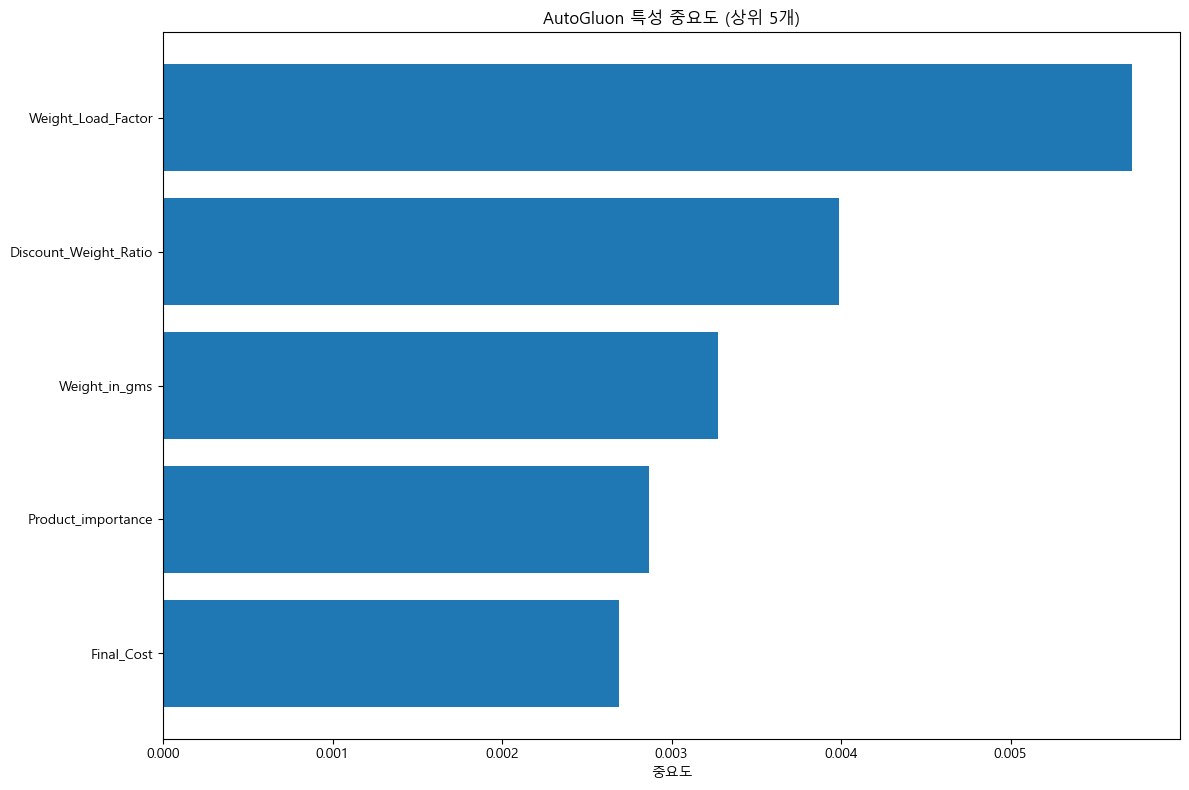

In [143]:
# 특성 중요도
print('=== 특성 중요도 ===')
feature_importance = predictor.feature_importance(test_data)
display(feature_importance.head(5))

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(5)
plt.barh(range(len(top_features)), top_features['importance'].values)
plt.yticks(range(len(top_features)), top_features.index)
plt.xlabel('중요도')
plt.title('AutoGluon 특성 중요도 (상위 5개)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 앙상블

In [144]:
# AutoGluon의 내부 앙상블 모델 확인
print('=== AutoGluon 앙상블 구성 ===')
model_info = predictor.info()
print(f"사용된 모델 수: {len(predictor.model_names())}")
print(f"\n모델 목록:")
for model_name in predictor.model_names():
    print(f"  - {model_name}")

=== AutoGluon 앙상블 구성 ===
사용된 모델 수: 19

모델 목록:
  - LightGBM_BAG_L1
  - RandomForestGini_BAG_L1
  - RandomForestEntr_BAG_L1
  - CatBoost_BAG_L1
  - ExtraTreesGini_BAG_L1
  - ExtraTreesEntr_BAG_L1
  - NeuralNetFastAI_BAG_L1
  - XGBoost_BAG_L1
  - NeuralNetTorch_BAG_L1
  - WeightedEnsemble_L2
  - LightGBMXT_BAG_L2
  - LightGBM_BAG_L2
  - RandomForestGini_BAG_L2
  - RandomForestEntr_BAG_L2
  - CatBoost_BAG_L2
  - ExtraTreesGini_BAG_L2
  - ExtraTreesEntr_BAG_L2
  - NeuralNetFastAI_BAG_L2
  - WeightedEnsemble_L3


In [145]:
from sklearn.metrics import accuracy_score

# 개별 모델 성능 비교
print('=== 개별 모델 성능 비교 ===')
model_results = {}
for model_name in predictor.model_names():
    try:
        # 'count' 대신 실제 타겟 변수명인 'target'을 제외하고 예측
        pred = predictor.predict(test_data.drop('target', axis=1), model=model_name)
        f1_score = f1_score(y_test, pred)
        model_results[model_name] = f1_score
    except:
        pass

# 결과 정렬 (정확도 기준 내림차순) 및 출력
model_results_sorted = dict(sorted(model_results.items(), key=lambda x: x[1], reverse=True))
for model, f1_score in model_results_sorted.items():
    print(f'{model}: Accuracy = {f1_score:.4f}')

=== 개별 모델 성능 비교 ===
LightGBM_BAG_L1: Accuracy = 0.7452


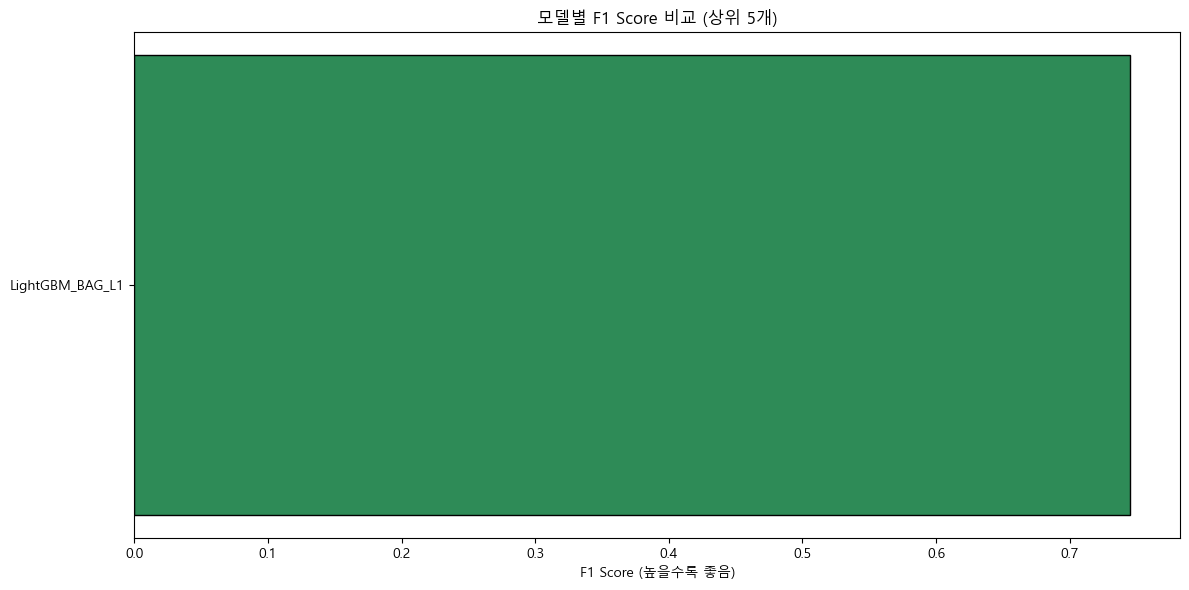

In [146]:
# 모델별 성능 시각화
plt.figure(figsize=(12, 6))
models = list(model_results_sorted.keys())[:5]  # 상위 5개 모델
f1_scores = [model_results_sorted[m] for m in models]

plt.barh(range(len(models)), f1_scores, color='seagreen', edgecolor='black')
plt.yticks(range(len(models)), models)
plt.xlabel('F1 Score (높을수록 좋음)')
plt.title('모델별 F1 Score 비교 (상위 5개)')
plt.gca().invert_yaxis()  # 높은 점수가 위로 오도록 정렬
plt.tight_layout()
plt.show()

### 모델 비교 평가

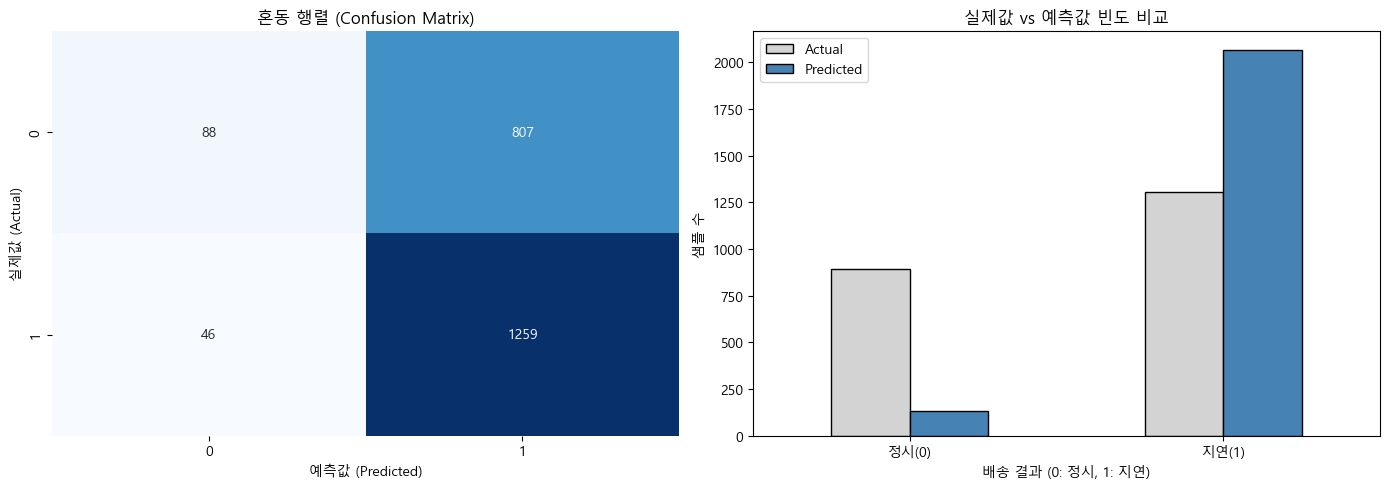

예측 통계:
- 전체 샘플 수: 2200
- 정답 수: 1347
- 정확도(Accuracy): 0.6123


In [147]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 예측값 생성 (타겟 변수명인 'target' 사용)
best_predictions = predictor.predict(test_data.drop('target', axis=1))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False)
axes[0].set_xlabel('예측값 (Predicted)')
axes[0].set_ylabel('실제값 (Actual)')
axes[0].set_title('혼동 행렬 (Confusion Matrix)')

# 2. 실제값 vs 예측값 빈도 비교
comparison_df = pd.DataFrame({
    'Actual': y_test.value_counts().sort_index(),
    'Predicted': pd.Series(best_predictions).value_counts().sort_index()
})
comparison_df.plot(kind='bar', ax=axes[1], color=['lightgray', 'steelblue'], edgecolor='black')
axes[1].set_xlabel('배송 결과 (0: 정시, 1: 지연)')
axes[1].set_ylabel('샘플 수')
axes[1].set_title('실제값 vs 예측값 빈도 비교')
axes[1].set_xticklabels(['정시(0)', '지연(1)'], rotation=0)

plt.tight_layout()
plt.show()

# 분류 통계 출력
correct = (y_test == best_predictions).sum()
total = len(y_test)
print(f'예측 통계:')
print(f'- 전체 샘플 수: {total}')
print(f'- 정답 수: {correct}')
print(f'- 정확도(Accuracy): {(correct/total):.4f}')

In [148]:
# 최종 성능 요약 (분류 모델 기준)
print('=' * 50)
print('AutoGluon 최종 성능 요약 (배송 지연 예측)')
print('=' * 50)
print(f'\n최고 성능 모델: {predictor.model_best}')
print(f'\n검증 데이터 성능 지표:')
print(f'  - F1 Score : {f1:.4f} (주요 지표)')
print(f'  - Accuracy : {accuracy:.4f}')
print(f'  - Precision: {precision:.4f}')
print(f'  - Recall   : {recall:.4f}')
print('=' * 50)

AutoGluon 최종 성능 요약 (배송 지연 예측)

최고 성능 모델: WeightedEnsemble_L3

검증 데이터 성능 지표:
  - F1 Score : 0.7470 (주요 지표)
  - Accuracy : 0.6123
  - Precision: 0.6094
  - Recall   : 0.9648


In [ ]:
.

SyntaxError: invalid syntax (1933637684.py, line 1)

(raylet) The node with node id: 8a9ad82827a7d7aaf6254747418df20ffd024569fea2f41cb86f8229 and address: 127.0.0.1 and node name: 127.0.0.1 has been marked dead because the detector has missed too many heartbeats from it. This can happen when a 	(1) raylet crashes unexpectedly (OOM, etc.) 
	(2) raylet has lagging heartbeats due to slow network or busy workload.


# 파라미터 중요도 분석

In [ ]:
import optuna
study_xgb = optuna.create_study(direction='minimize', sampler=sampler, pruner=pruner)
study_xgb.optimize(objective_xgb, n_trials=50, show_progress_bar=True)



In [ ]:
top5_models = leaderboard['model'].head(5).tolist()

for m in top5_models:
    print("\nMODEL:", m)
    print(predictor.info()['model_info'][m]['hyperparameters'])

['WeightedEnsemble_L2', 'LightGBM', 'XGBoost', 'LightGBMLarge', 'LightGBMXT']

MODEL: WeightedEnsemble_L2
{'use_orig_features': False, 'valid_stacker': True, 'max_base_models': 0, 'max_base_models_per_type': 'auto', 'save_bag_folds': True, 'stratify': 'auto', 'bin': 'auto', 'n_bins': None, 'vary_seed_across_folds': False, 'model_random_seed': 0}

MODEL: LightGBM
{'learning_rate': 0.05, 'seed': 0}

MODEL: XGBoost
{'n_estimators': 10000, 'learning_rate': 0.1, 'n_jobs': -1, 'proc.max_category_levels': 100, 'objective': 'binary:logistic', 'booster': 'gbtree', 'seed': 0}

MODEL: LightGBMLarge
{'learning_rate': 0.03, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 3, 'seed': 0}

MODEL: LightGBMXT
{'learning_rate': 0.05, 'extra_trees': True, 'seed': 0}


### LightGBM

In [ ]:
# LightGBM 파라미터 중요도
fig = optuna.visualization.plot_param_importances(study_lgbm)
fig.update_layout(title='LightGBM 파라미터 중요도')
fig.show()

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[76]	valid_0's binary_logloss: 0.503421


C:\Users\User\AppData\Local\Temp\ipykernel_26968\2675378464.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ftr_importances, y=ftr_importances.index, palette='magma')


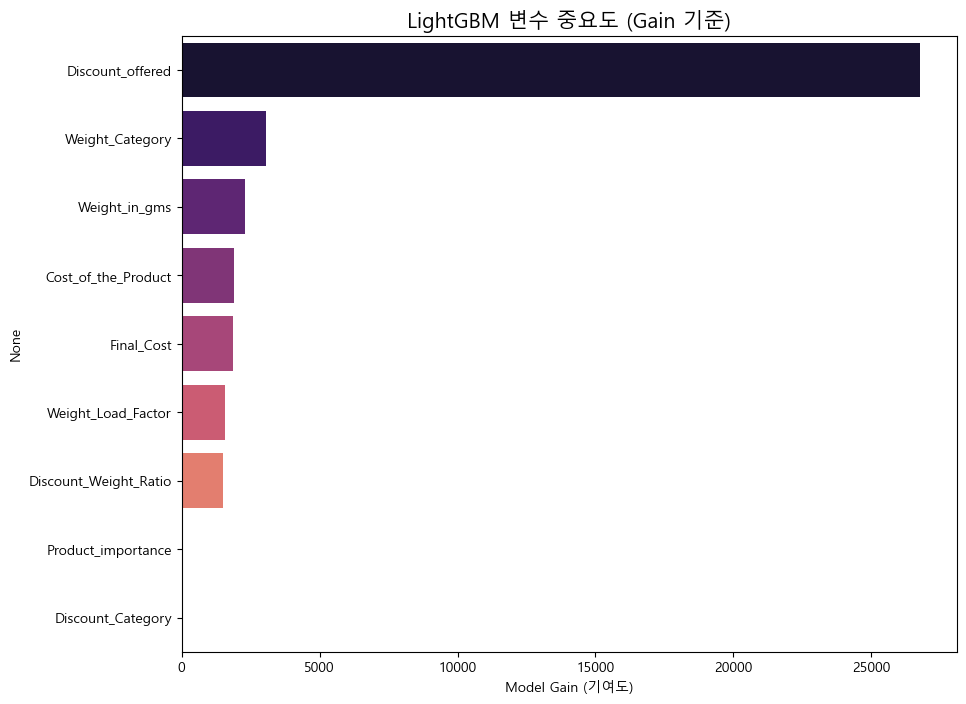

모델 정확도: 0.6739

[상세 평가 보고서]
              precision    recall  f1-score   support

           0       0.57      0.82      0.67       895
           1       0.83      0.57      0.67      1305

    accuracy                           0.67      2200
   macro avg       0.70      0.70      0.67      2200
weighted avg       0.72      0.67      0.67      2200



In [ ]:
import lightgbm as lgb
from sklearn.metrics import f1_score, classification_report

# 사용자가 지정한 하이퍼파라미터 반영
predictor = lgb.LGBMClassifier(
    learning_rate=0.05,    # 학습률: 모델이 가중치를 업데이트하는 보폭
    random_state=0,         # seed 값: 결과의 재현성을 위해 0으로 설정
    n_estimators=1000,      # 조기 종료를 위해 충분히 크게 설정
    importance_type='gain'  # 리더보드의 실제 기여도와 유사하게 맞춤
)

predictor.fit(
    x_train, y_train,
    eval_set=[(x_test, y_test)],
    callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(period=0)]
)

# 4. 변수 중요도 추출 및 시각화
ftr_importances_values = model_lgb.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=ftr_importances, y=ftr_importances.index, palette='magma')
plt.title('LightGBM 변수 중요도 (Gain 기준)', fontsize=15)
plt.xlabel('Model Gain (기여도)')
plt.show()




# 5. 성능 평가
y_pred = model_lgb.predict(x_test)
print(f"모델 정확도: {f1_score(y_test, y_pred):.4f}")
print("\n[상세 평가 보고서]")
print(classification_report(y_test, y_pred))

LightGBMXT

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	valid_0's binary_logloss: 0.500468


C:\Users\User\AppData\Local\Temp\ipykernel_26968\2465243694.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ftr_importances, y=ftr_importances.index, palette='plasma')


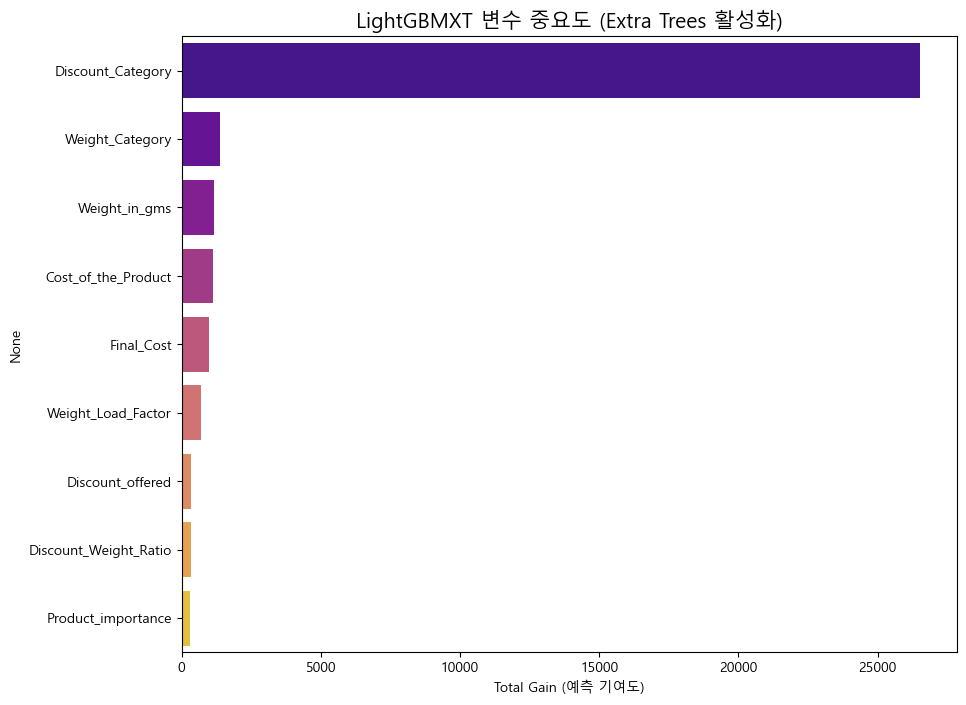

🥇 LightGBMXT F1-Score: 0.6714

[상세 평가 보고서]
              precision    recall  f1-score   support

           0       0.57      0.89      0.70       895
           1       0.88      0.54      0.67      1305

    accuracy                           0.69      2200
   macro avg       0.73      0.72      0.68      2200
weighted avg       0.76      0.69      0.68      2200



In [ ]:
import lightgbm as lgb
from sklearn.metrics import f1_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. LightGBMXT 스타일 모델 선언
# extra_trees=True 옵션이 핵심입니다.
model_lgbmxt = lgb.LGBMClassifier(
    learning_rate=0.05,
    extra_trees=True,      # Extra Trees 방식 활성화
    random_state=0,        # seed=0 반영
    n_estimators=1000,
    importance_type='gain' # 기여도 분석을 위해 gain 설정
)

# 2. 모델 학습
model_lgbmxt.fit(
    x_train, y_train,
    eval_set=[(x_test, y_test)],
    eval_metric='f1',
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=0)
    ]
)

# 3. 변수 중요도 시각화
ftr_importances = pd.Series(
    model_lgbmxt.feature_importances_, 
    index=x_train.columns
).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=ftr_importances, y=ftr_importances.index, palette='plasma')
plt.title('LightGBMXT 변수 중요도 (Extra Trees 활성화)', fontsize=15)
plt.xlabel('Total Gain (예측 기여도)')
plt.show()

# 4. 최종 성능 평가 (F1-Score)
y_pred = model_lgbmxt.predict(x_test)
f1_val = f1_score(y_test, y_pred)

print(f"🥇 LightGBMXT F1-Score: {f1_val:.4f}")
print("\n[상세 평가 보고서]")
print(classification_report(y_test, y_pred))

### XGB

C:\Users\User\AppData\Local\Temp\ipykernel_26968\977464000.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ftr_importances, y=ftr_importances.index, palette='viridis')


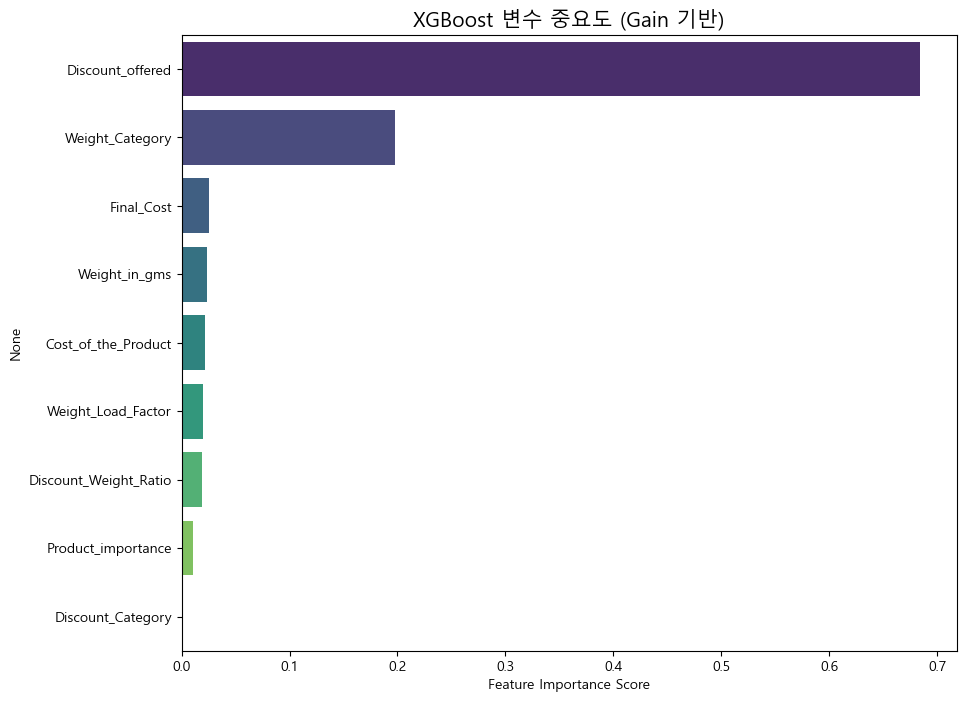

🥇 XGBoost F1-Score: 0.6632

[상세 평가 보고서]
              precision    recall  f1-score   support

           0       0.57      0.89      0.69       895
           1       0.88      0.53      0.66      1305

    accuracy                           0.68      2200
   macro avg       0.72      0.71      0.68      2200
weighted avg       0.75      0.68      0.68      2200



In [ ]:
# {'n_estimators': 10000, 'learning_rate': 0.1, 'n_jobs': -1, 'proc.max_category_levels': 100, 'objective': 'binary:logistic', 'booster': 'gbtree', 'seed': 0}
import xgboost as xgb
from sklearn.metrics import f1_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

params = {
    'n_estimators': 10000, 
    'learning_rate': 0.1, 
    'n_jobs': -1, 
    'objective': 'binary:logistic', 
    'booster': 'gbtree', 
    'seed': 0,
    'early_stopping_rounds': 50,  # fit에서 이쪽으로 이동
    'tree_method': 'hist'         # 이전 코드에 있던 효율적 연산 옵션
}

model_xgb = xgb.XGBClassifier(**params)

# 2. 모델 학습 (조기 종료 설정)
# eval_metric='logloss' 또는 'error'를 사용하여 학습을 모니터링합니다.
model_xgb.fit(
    x_train, y_train,
    eval_set=[(x_test, y_test)],
    verbose=False,             
)

# 3. 변수 중요도 (Gain 기준) 시각화
# XGBoost는 기본적으로 'gain' 중요도를 지원합니다.
ftr_importances = pd.Series(
    model_xgb.feature_importances_, 
    index=x_train.columns
).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=ftr_importances, y=ftr_importances.index, palette='viridis')
plt.title('XGBoost 변수 중요도 (Gain 기반)', fontsize=15)
plt.xlabel('Feature Importance Score')
plt.show()

# 4. 성능 평가 (F1-Score)
y_pred = model_xgb.predict(x_test)
f1_val = f1_score(y_test, y_pred)

print(f"🥇 XGBoost F1-Score: {f1_val:.4f}")
print("\n[상세 평가 보고서]")
print(classification_report(y_test, y_pred))

### LightGBMLarge

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[118]	valid_0's binary_logloss: 0.515111


C:\Users\User\AppData\Local\Temp\ipykernel_26968\2179193307.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ftr_importances, y=ftr_importances.index, palette='viridis')


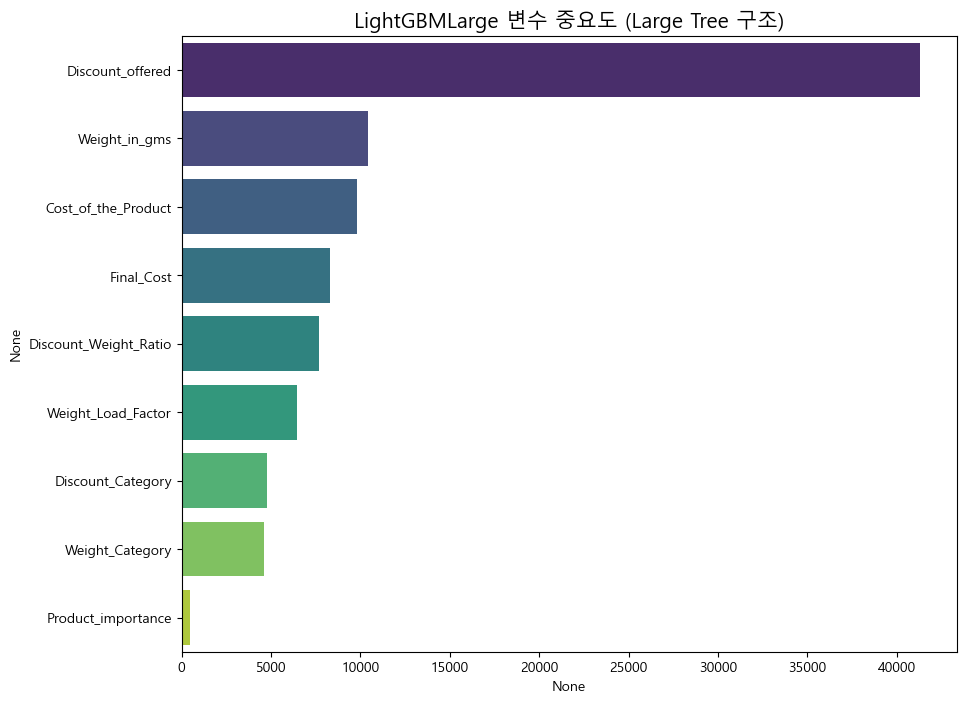

🥇 LightGBMLarge F1-Score: 0.6825

[상세 평가 보고서]
              precision    recall  f1-score   support

           0       0.56      0.73      0.64       895
           1       0.77      0.62      0.68      1305

    accuracy                           0.66      2200
   macro avg       0.67      0.67      0.66      2200
weighted avg       0.68      0.66      0.66      2200



In [ ]:
import lightgbm as lgb
from sklearn.metrics import f1_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. LightGBMLarge 파라미터 반영
# 복잡한 모델이므로 'gain' 중요도를 통해 어떤 변수가 이 거대한 트리를 만드는지 확인합니다.
model_lgb_large = lgb.LGBMClassifier(
    learning_rate=0.03,       # 조금 더 세밀하게 학습 (기존 0.05에서 하향)
    num_leaves=128,           # 트리의 복잡도 대폭 증가 (기본 31)
    feature_fraction=0.9,     # 학습 시 변수의 90%만 무작위 선택 (과적합 방지)
    min_data_in_leaf=3,       # 리프 노드에 최소 3개 데이터만 있어도 분할 (매우 공격적)
    random_state=0,           # seed=0 반영
    n_estimators=2000,        # 충분한 학습 횟수 확보
    importance_type='gain'    # 기여도 기준 시각화
)

# 2. 모델 학습
model_lgb_large.fit(
    x_train, y_train,
    eval_set=[(x_test, y_test)],
    eval_metric='f1',
    callbacks=[
        lgb.early_stopping(stopping_rounds=100), # 모델이 복잡하므로 조금 더 지켜봅니다
        lgb.log_evaluation(period=0)
    ]
)

# 3. 변수 중요도 시각화
ftr_importances = pd.Series(
    model_lgb_large.feature_importances_, 
    index=x_train.columns
).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=ftr_importances, y=ftr_importances.index, palette='viridis')
plt.title('LightGBMLarge 변수 중요도 (Large Tree 구조)', fontsize=15)
plt.show()

# 4. 최종 성능 평가
y_pred = model_lgb_large.predict(x_test)
f1_val = f1_score(y_test, y_pred)

print(f"🥇 LightGBMLarge F1-Score: {f1_val:.4f}")
print("\n[상세 평가 보고서]")
print(classification_report(y_test, y_pred))

In [ ]:
df.describe().round(4)

,Cost_of_the_Product,Product_importance,Discount_offered,Weight_in_gms,target,Discount_Category,Weight_Category,Discount_Weight_Ratio,Final_Cost,Weight_Load_Factor
count,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000
mean,210.1968,1.3460,13.3732,3634.0167,0.5967,0.7593,0.6201,0.0060,183.1640,2601.6454
std,48.0633,0.6314,16.2055,1635.3773,0.4906,0.4275,0.7488,0.0094,56.9073,1553.1516
min,96.0000,0.0000,1.0000,1001.0000,0.0000,0.0000,0.0000,0.0002,36.6300,335.6667
25%,169.0000,1.0000,4.0000,1839.5000,0.0000,1.0000,0.0000,0.0009,140.1500,1400.0000
50%,214.0000,1.0000,7.0000,4149.0000,1.0000,1.0000,0.0000,0.0017,186.2400,2196.5000
75%,251.0000,2.0000,10.0000,5050.0000,1.0000,1.0000,1.0000,0.0062,231.2800,3859.5000
max,310.0000,2.0000,65.0000,7846.0000,1.0000,1.0000,2.0000,0.0595,306.9000,6000.0000
